
# Curve Fitting - Week 1 Task

In [1]:
#the following was taken from [1]:

from IPython import display
import numpy as np  #import the numpy library as np
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

## Part 1 - Defining Polynomial Functions
Create a function with the following definition 

                                          `def polyModelWithNoise(x,theta,sigma)`
where "x" is a numpy array of x values, "theta" are the parameters of the polynomial such that $y(x) = \sum_i \theta_i x^i..(1)$  and sigma is the standard deviation of the noise distribution that is added to the polynomial function. 

[2]


In [2]:
def polyModelWithNoise(x,theta,sigma):
    ''' Polynomial function with noise
    
    Inputs:
    x: x poits/values
    theta: parameters of the polynomial
    sigma: standard deviation of the noise (which is a normal distribution)
    
    Outputs:
    polyModelWithNoise(x,theta,sigma): the polynomial function + noise

    '''
    
    #code the polynomial summation with a for loop:
    y = 0 #set inital y value
    for i in range(len(theta)):
        y = y + theta[i]*(x**i) #the summation shown in (1)

    noise = np.random.normal(0,sigma,len(x)) #noise to be added 
    return noise + y #the polynomial function + noise

Use your function to plot a sample of 100 points linearly arranged between 0 and 1, with theta parameters of [0,1] and a noise sigma of 0.5 [2]. So this is asking us to plot polynomial of order 1 using our function above.

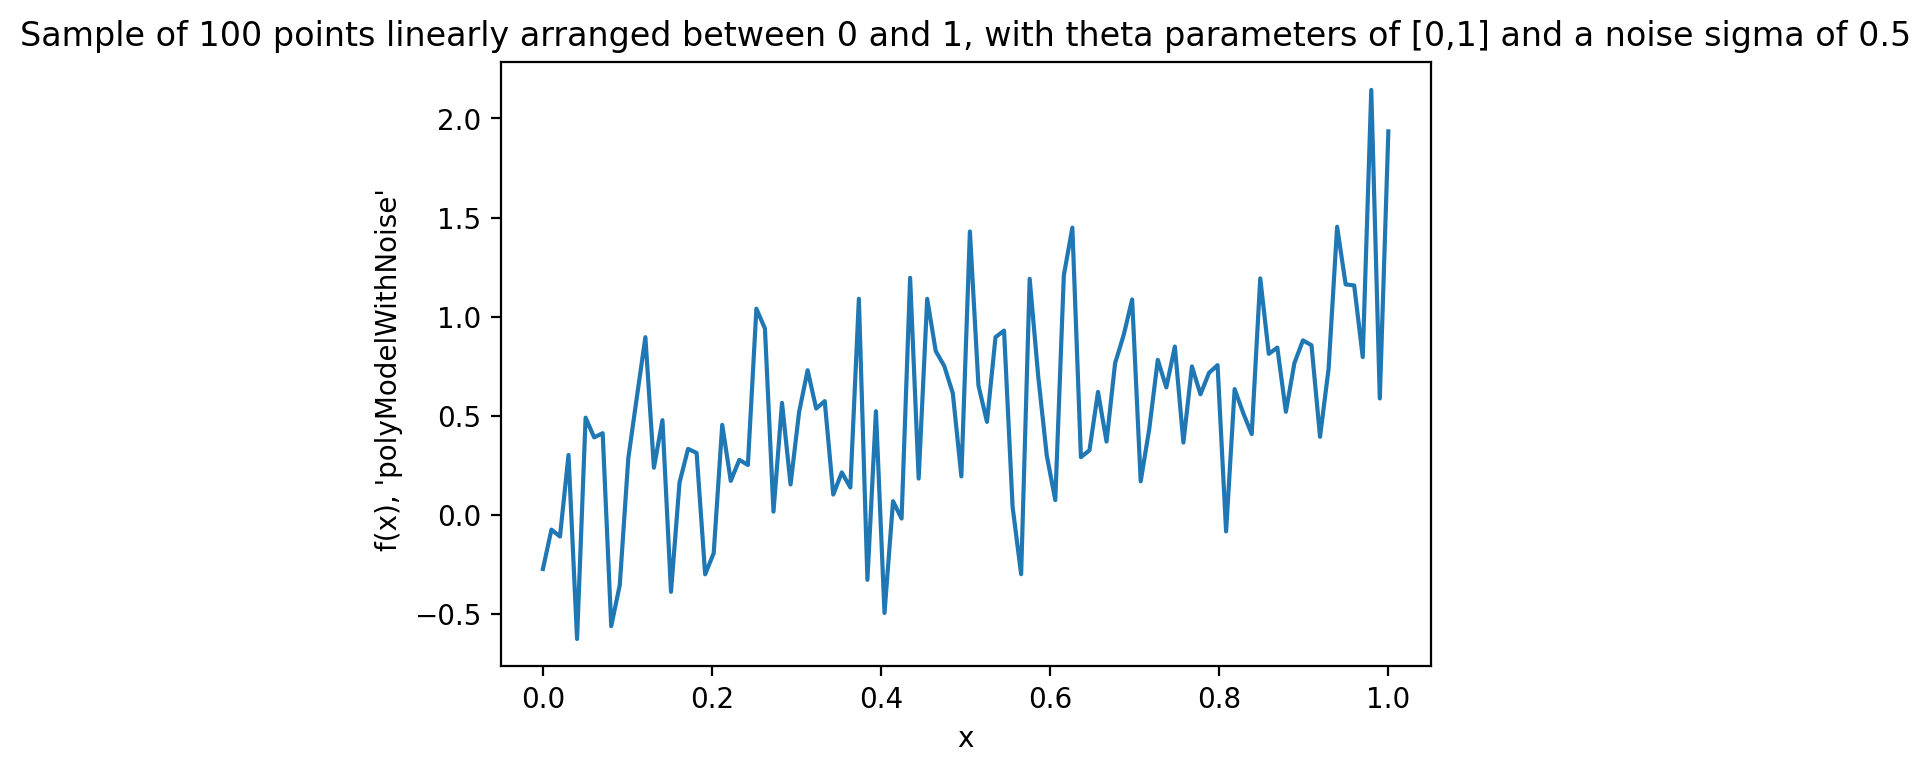

In [3]:
x=np.linspace(0,1,100) #use linspace() to generate linearly arrainged x points between 0 and 1

plt.figure()
plt.plot(x,polyModelWithNoise(x,[0,1],0.5))
plt.xlabel("x")
plt.ylabel("f(x), 'polyModelWithNoise' ")
plt.title("Sample of 100 points linearly arranged between 0 and 1, with theta parameters of [0,1] and a noise sigma of 0.5")
plt.show()

Define another function with the definition `def polyGradient(x,theta):` which will return the gradient of the polynomial function with respect to the parameters theta. [2]

The gradient of a polynomial with repect to theta is:

$$ \frac{dy}{d\theta_i} = x^i ...  (2)$$

where $\theta_i$ is the $i^{th}$ parameter of the polynomial.



\
Using this gradient starting a some starting value of $\theta_i$ we can define an update rule to determine the next value of 
$\theta_{i+1}$ via

$$ \theta_{i+1} = \theta_{i} - \eta_i  \left<  y_{model}-y_{data}\right> \frac{\partial y}{\partial \theta} \ (3)$$

where $\eta_i$ is the *learning rate* which controls how big a step we take from one value of $\theta$ to the next.[2] This eq is basically the gradient decent algorithm. It works by getting to the theta value that will have the smallest loss function / global minimum of the loss function (loss function is the difference between model data and 'raw' data... ie difference between output and expected):


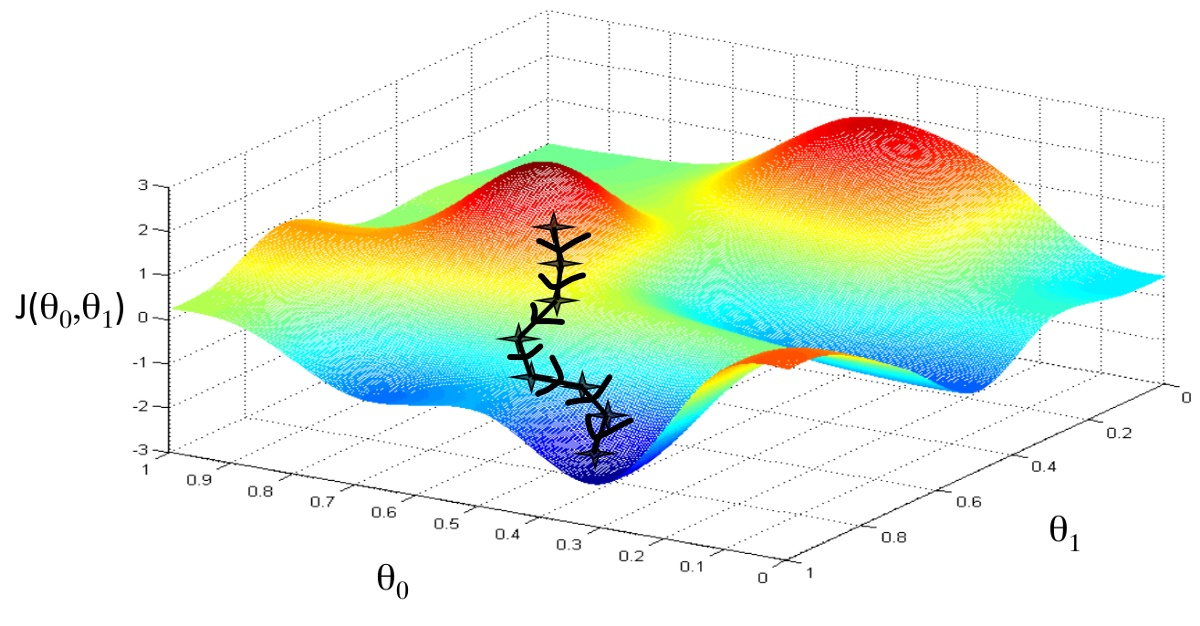

In [4]:
display.Image("gd.jpg")

where, here, the thetas are the polynomial parameters which are the weights here. And the J is the loss function or the chi-squared statistic. The chi-squared statistic is the basically the "deviation" which you will also see later. How is it the deviation when it is a function of the polynomial parameters... because the deviation is a function of the parameters:

For 1st Order:

$$ y_{model\ / \ current}(\theta_0, \theta_1, x) = \theta_0 + \theta_1x \ \ \ ,\ \ \  \chi^2(\theta_0, \theta_1) = \frac{1}{n}\sum{(y_{model}-y_{data\ / \ goal})^2} = <(y_{model}-y_{data\ / \ goal})^2> $$ 


Anyway... the gradient of a polynomial:

In [5]:
def polyGradient(x,theta):
    ''' gradient of polynomial wrt theta
    
    Inputs:
    x: x poits/values
    theta: parameters of the polynomial
    
    Outputs:
    polyGradient(x,theta): array of gradients of the polynomial data wrt to each theta

    '''
    #use a for loop to generate the gradients (equation [2]):
    grad_array = np.array([pow(x,i) for i in range(len(theta))])  
    
    return grad_array

## Part 2 - Stochastic Gradient Decent Algorithm

Implement a stochastic gradient descent algorithm to do the following:
1. Start with theta values of $\theta = [-1,0.5]$, and a learning rate of 0.5 then in a loop do the following 100 times:
2. Generate a sample of 10 random x values between 0 and 1
3. Generate 10 y data values using your polyModelWithNoise function with the truth parameters $\theta=[0,1]$,$\sigma=0.5$
4. Generate 10 y model values using the current theta values which started at $\theta = [-1,0.5]$, but no noise
5. Update the theta values using the gradient descent algorithm 

[2]


In [7]:
numSteps = 100
learning_rate = 0.5
theta = [-1,0.5] #starting theta values

#iteration of Stochastic Gradient Decent Algorithm with iterations of 'numSteps':
for i in range(numSteps):
    x=np.random.uniform(0,1,10) #10 random x values between 0,1 (STOCHASTIC GDA.. meaning only part of full raw data)
    
    #polynomial with the true theta values (the values we are trying to get to) + noise [raw data]:
    y_data = polyModelWithNoise(x,[0,1],0.5) 
    #polynomial with the starting theta values + no noise [GDA model]... we start w 'random' theta values then 
    #use the GDA to get closer to the the theta values that will fit good to our raw data.. we call this the GDA model:
    y_model = polyModelWithNoise(x,theta,0)
    
    #difference/deviation between data and model values 
    deviation = y_model - y_data  #(current - expected... expected for the theta values)
    
    #update theta values using gradient decent algorithm:
    theta-=learning_rate*np.average(deviation[None,:]*polyGradient(x,theta), axis=1) #eq 3
    
    
    print(theta, "Theta values for iteration number", i+1)


print("Final Theta Values:", theta)

[-0.44112566  0.74369956] Theta values for iteration number 1
[-0.19017736  0.87775235] Theta values for iteration number 2
[-0.09718991  0.93258338] Theta values for iteration number 3
[0.10743457 1.03349542] Theta values for iteration number 4
[0.1188461  1.06685259] Theta values for iteration number 5
[-0.00440423  1.01516827] Theta values for iteration number 6
[-0.06101039  0.97740012] Theta values for iteration number 7
[5.79201254e-04 9.96803430e-01] Theta values for iteration number 8
[0.00635535 0.98080321] Theta values for iteration number 9
[-0.06499683  0.93644538] Theta values for iteration number 10
[0.01440425 0.99167067] Theta values for iteration number 11
[-0.04719401  0.91943266] Theta values for iteration number 12
[0.01142596 0.95711015] Theta values for iteration number 13
[-0.00475364  0.94660811] Theta values for iteration number 14
[-0.04826     0.91992274] Theta values for iteration number 15
[0.08836611 0.96015873] Theta values for iteration number 16
[-0.007

#### Comments on result:

The results are relativley close to our true theta values ([0,1]), however, increasing the 'numSteps' would provide a more accurate result since more iterations are performed.

## Part 3 - Different Order Polynomials:

Now let's switch to testing using a third order polynomial with parameters $\theta =[0,1,2,2]$ using the same noise as before

Fit this third order polynomial data using a 1st order polynomial, 3rd order polynomial and 7th order polynomial using a stochastic gradient algorithm that samples 10 x and y data values between 0 and 1.

[2]


### 3rd order:

In [6]:
numSteps = 100
learning_rate = 0.5
theta3 = [-1,0.5, 1, -0.5] #arbitrary third order starting theta values
#(alternativley, a random generation of starting theta values could have been implemented)

for i in range(numSteps):
    x=np.random.uniform(0,1,10)
    
    y_data = polyModelWithNoise(x,[0,1,2,2],0.5) #data y with the third order true theta values
    y_model = polyModelWithNoise(x,theta3, 0)#model y with the third order starting theta values
    
    deviation = y_model - y_data
    
    theta3-=learning_rate*np.average(deviation[None,:]*polyGradient(x,theta3))
    print(theta3, "Theta values for iteration number", i+1 )

[-0.37726622  1.12273378  1.62273378  0.12273378] Theta values for iteration number 1
[-0.23024951  1.26975049  1.76975049  0.26975049] Theta values for iteration number 2
[-0.15653069  1.34346931  1.84346931  0.34346931] Theta values for iteration number 3
[0.10993218 1.60993218 2.10993218 0.60993218] Theta values for iteration number 4
[0.1728909 1.6728909 2.1728909 0.6728909] Theta values for iteration number 5
[0.08934158 1.58934158 2.08934158 0.58934158] Theta values for iteration number 6
[0.04159355 1.54159355 2.04159355 0.54159355] Theta values for iteration number 7
[0.14526563 1.64526563 2.14526563 0.64526563] Theta values for iteration number 8
[0.09265474 1.59265474 2.09265474 0.59265474] Theta values for iteration number 9
[0.07572795 1.57572795 2.07572795 0.57572795] Theta values for iteration number 10
[0.0238787 1.5238787 2.0238787 0.5238787] Theta values for iteration number 11
[0.15528535 1.65528535 2.15528535 0.65528535] Theta values for iteration number 12
[0.114818

### 1st Order:

In [7]:
numSteps = 100
learning_rate = 0.5
theta1 = [-1,0.5] # arbitrary first order starting theta values

for i in range(numSteps):
    x=np.random.uniform(0,1,10)
    
    y_data = polyModelWithNoise(x,[0,1,2,2],0.5) #data y with the third order true theta values
    y_model = polyModelWithNoise(x,theta1, 0) #model y with the first order starting theta values
    
    deviation = y_model - y_data
    
    theta1-=learning_rate*np.average(deviation[None,:]*polyGradient(x,theta1))
    print(theta1 , "Theta values for iteration number", i+1 )

[0.07499533 1.57499533] Theta values for iteration number 1
[0.38197549 1.88197549] Theta values for iteration number 2
[0.53445794 2.03445794] Theta values for iteration number 3
[0.70420424 2.20420424] Theta values for iteration number 4
[0.5959624 2.0959624] Theta values for iteration number 5
[0.4042142 1.9042142] Theta values for iteration number 6
[0.60534072 2.10534072] Theta values for iteration number 7
[0.60641288 2.10641288] Theta values for iteration number 8
[0.74548282 2.24548282] Theta values for iteration number 9
[0.94063001 2.44063001] Theta values for iteration number 10
[0.83038573 2.33038573] Theta values for iteration number 11
[0.63016507 2.13016507] Theta values for iteration number 12
[0.73393885 2.23393885] Theta values for iteration number 13
[0.81004528 2.31004528] Theta values for iteration number 14
[0.68051793 2.18051793] Theta values for iteration number 15
[0.84368781 2.34368781] Theta values for iteration number 16
[0.62240672 2.12240672] Theta values 

### 7th Order:

In [8]:
numSteps = 100
learning_rate = 0.5
theta7 = [-1, 0.5, 1, -0.5, 2, -3 ,3 ,0] # arbitrary seventh order starting theta values

for i in range(numSteps):
    x=np.random.uniform(0,1,10)
    
    y_data = polyModelWithNoise(x,[0,1,2,2],0.5) #data y with the third order true theta values
    y_model = polyModelWithNoise(x,theta7, 0) #model y with the seventh order starting theta values
    
    deviation = y_model - y_data
    
    theta7-=learning_rate*np.average(deviation[None,:]*polyGradient(x,theta7))
    
    print(theta7, "Theta values for iteration number", i+1 )

[-0.67154475  0.82845525  1.32845525 -0.17154475  2.32845525 -2.67154475
  3.32845525  0.32845525] Theta values for iteration number 1
[-0.51083026  0.98916974  1.48916974 -0.01083026  2.48916974 -2.51083026
  3.48916974  0.48916974] Theta values for iteration number 2
[-0.47508531  1.02491469  1.52491469  0.02491469  2.52491469 -2.47508531
  3.52491469  0.52491469] Theta values for iteration number 3
[-0.42474513  1.07525487  1.57525487  0.07525487  2.57525487 -2.42474513
  3.57525487  0.57525487] Theta values for iteration number 4
[-0.34315651  1.15684349  1.65684349  0.15684349  2.65684349 -2.34315651
  3.65684349  0.65684349] Theta values for iteration number 5
[-0.35401969  1.14598031  1.64598031  0.14598031  2.64598031 -2.35401969
  3.64598031  0.64598031] Theta values for iteration number 6
[-0.32254791  1.17745209  1.67745209  0.17745209  2.67745209 -2.32254791
  3.67745209  0.67745209] Theta values for iteration number 7
[-0.28786393  1.21213607  1.71213607  0.21213607  2.712

## Part 4 - Plot and Comparison

Plot the third order polynomial data over an expanded x-range of -0.5,1.5 (with linearly spaced x values).


Compare the data to your three best fit models (which were trained over the range x=0,1) comment on how well the models generalise to the regions of x over which they were not trained. 


[2]

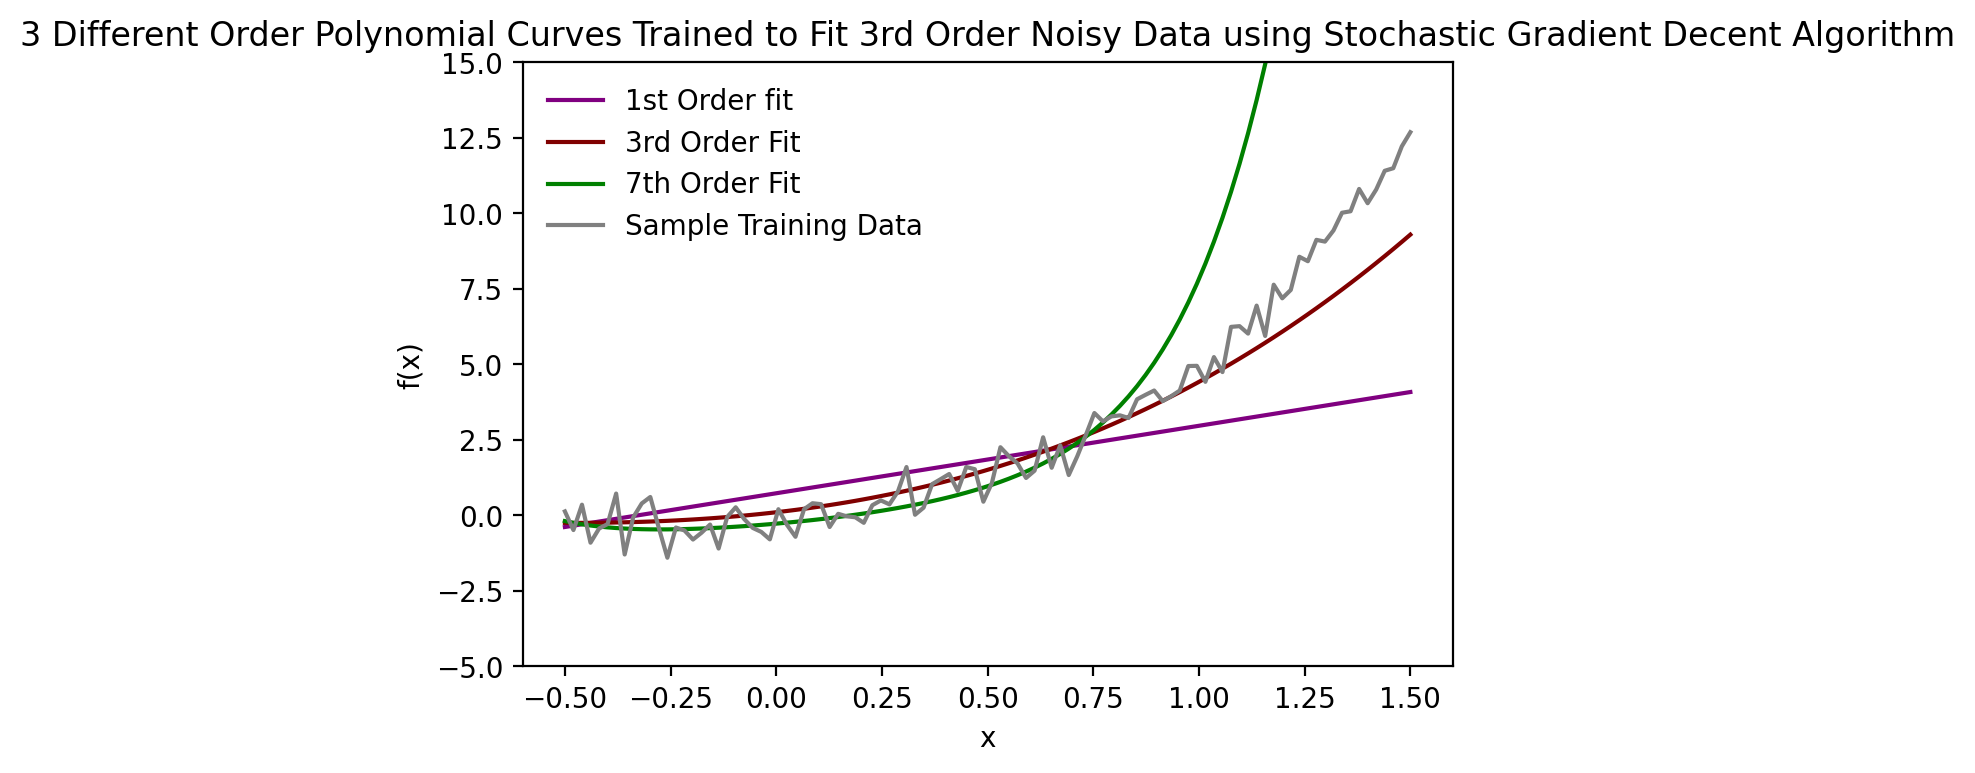

In [9]:
x_range = np.linspace(-0.5,1.5,100) #expanded x-range of -0.5,1.5

plt.figure()
plt.plot(x_range, polyModelWithNoise(x_range,theta1,0), color = 'purple', label="1st Order fit") #1st order
plt.plot(x_range, polyModelWithNoise(x_range,theta3,0), color = 'maroon', label="3rd Order Fit") #3rd order
plt.plot(x_range, polyModelWithNoise(x_range,theta7,0), color = 'green', label="7th Order Fit") #7th order
plt.xlabel("x")
plt.ylabel("f(x)")    
plt.plot(x_range, polyModelWithNoise(x_range,[0,1,2,2],0.5), color = 'grey', label="Sample Training Data") #sample training data
plt.ylim(-5, 15)
plt.title("3 Different Order Polynomial Curves Trained to Fit 3rd Order Noisy Data using Stochastic Gradient Decent Algorithm")
plt.legend()
plt.show()

### Comparison

The models are best fitted in the region between 0 and 1 x values. However, below 0, the models maintain a good fit. However, beyond 1 (and even a bit before), the models are a very poor fit. The third order is an exception because it is the same order as the true training data. Therefore, the best fit is, of course, the third order fit. 

The polynomial thetas that we got from the SGDA was only trained over 0,1 x values which means that beyond that the theta values will not fit our raw data accuratley. This is a disadvantage of SGDA because it uses a sample of the full raw data to obtain the result as opposed to the GDA which uses the full data.


### NB: THE OBJECTIVE OF GRADIENT DESCENT IS TO MINIMISE THE LOSS

## References

[1]Nichol. R 2021. " Week1_CurveFitting.ipynb". [Online] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/course/view.php?id=6793 [accessed 10th October 2021] 

[2] Nichol. R 2021. " Module 1 Exercises". [Online] UCL Moodle resource. Available from https://moodle.ucl.ac.uk/mod/assign/view.php?id=395890 [accessed 10th October 2021]